In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Hypothesis Testing

This jupyter notebook contains code that demonstrates the underlying theory of a hypothesis testing. The example follows the videos and examples from Khan Academy's hypothesis testing videos, found [here.]( https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/hypothesis-testing-and-p-values)

### Prompt:
A neurologist is testing the effect of a drug on response time by randomly injecting 100 rats with a unit dose of the drug, subjecting each to neurological stimulus, and recording it's response time. The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds. The mean of the 100 injected rats' response times is 1.05 seconds with a sample standard deviation of 0.5 seconds.

__Research question:__ Does the drug have an effect on response time?

How can we anser this research question?

In [153]:
# Import necessary packages and make sure in the right location
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

# Check what directory we're in
# os.getcwd()

Consider the distribution of response times to the neurological stimulus in the population of all rats. Note that the population distribution of response times for all rats is practically impossible to know, but pretend we are omniscient for the sake of the problem and that we know the mean response time for all rats is 1.2 seconds.

Due to the Central Limit Theorem, we can assume that the population distribution of response times is normally distributed, with mean 1.2 seconds and some variance. Thus, the distribution of response times in the rat population is a random variable X that is normally distributed with mean $\mu$ and variance $\sigma^2\$:

<br>

<center> $X \sim Normal(\mu, \sigma^2)$, </center>

where $\mu$ = 1.2

For convenience sake, let's assume that the standard deviation of the population distribution is equal to the standard deviation of the sample, $\sigma = sd$:

<br>
<center> $X \sim Normal(1.2, 0.5^2)$, </center>

Below is a visual of what this population distribution looks like:

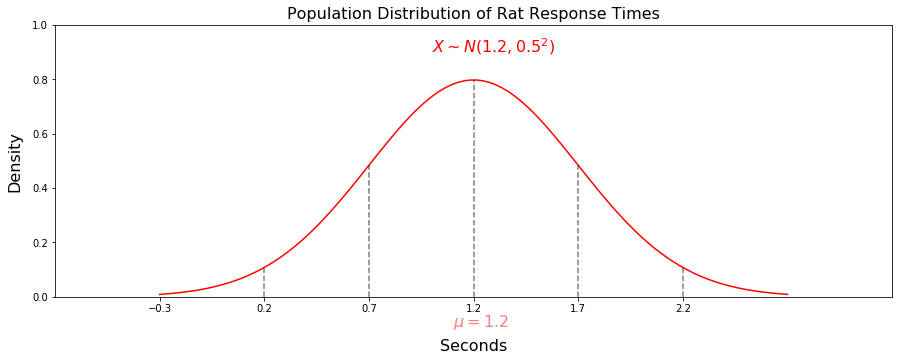

In [154]:
# Plot a normal distribution with mean 1.2 and std dev 0.5
mu = 1.2
sigma = 0.5
rat_pop = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) # 100 evenly spaced numbers in range mu-3*sigma and mu+3*sigma

# normal distribution approximation function
#x = 1.2
#ymax = 1/math.sqrt(2*math.pi*sigma**2)*math.exp(-(x-mu)**2/2*sigma**2)

# Get height of standard deviation lines
xposition = [mu, mu+sigma, mu+sigma*2, mu-sigma, mu-sigma*2]
std_dev_lines = stats.norm.pdf(xposition, mu, sigma)

plt.figure(figsize=(15, 5))
plt.plot(rat_pop, stats.norm.pdf(rat_pop, mu, sigma), color='red')
plt.ylabel('Density', fontsize=16, labelpad=10) # Label the y axis
plt.xlabel('Seconds', fontsize=16, labelpad=25) # Label the x axis
plt.title('Population Distribution of Rat Response Times', fontsize=16) # Plot title
plt.axis([mu-4*sigma, mu+4*sigma, 0, 1]) # Plot axis [xmin, xmax, ymin, ymax]
#plt.grid(True) # Add grid lines
#axvline(self, x=0, ymin=0, ymax=1, **kwargs)[source]
#plt.axvline(x=1.2, ymin=0, ymax=ymax, linestyle='dashed', color='red', alpha=0.5)
plt.text(1, .9, '$X \sim N(1.2, 0.5^2)$', color='red', fontsize=16)
for xc, yc in zip(xposition, std_dev_lines): # This is how to loop through two vectors simultaneously
    plt.axvline(x=xc, ymax=yc, color='k', linestyle='--', alpha=0.5)
plt.xticks(np.arange(mu-sigma*3, mu+sigma*3, 0.5))
plt.text(1.1, -0.11, '$\mu = 1.2$', fontsize=16, color = 'red', alpha = 0.5)
plt.show()

Now, consider the sample of 100 rats that were randomly treated with the drug. Their mean response time was 1.05 seconds, with a standard deviation of 0.5 seconds:

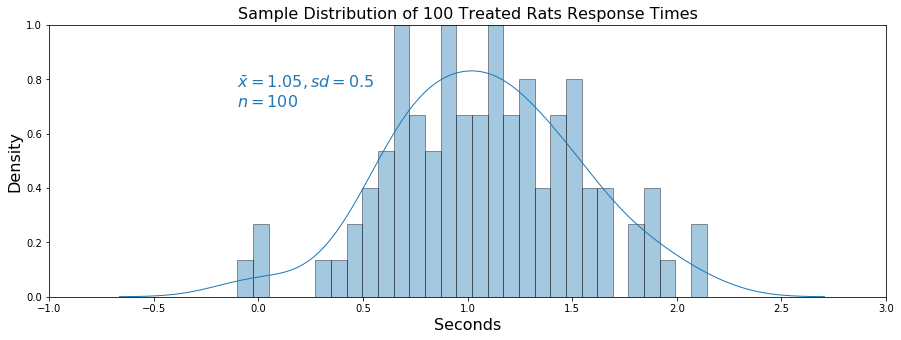

In [155]:
# Create the figure using the seaborn package's distplot instead of matplotlib
# Seaborn easily allows plotting a distribution as both a histogram and a continuous line
# Seaborn inherits much of matplotlib's syntax, so you can edit the aesthetics similarly

# Set the seed so the distribution is the same each time
np.random.seed(1)
rat_drug = np.random.normal(1.05, 0.5, 100) # Creates 100 length array of random numbers from a distribution with mean 1.05
# and sd 0.5

plt.figure(figsize=(15, 5))
sns.distplot(rat_drug, hist=True, kde=True, bins = int((max(rat_pop)-min(rat_pop))/.1),
            hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
plt.ylabel('Density', fontsize=16) # Label the y axis
plt.xlabel('Seconds', fontsize=16) # Label the x axis
plt.title('Sample Distribution of 100 Treated Rats Response Times', fontsize=16) # Plot title
plt.axis([-1, 3, 0, 1]) # Plot axis [xmin, xmax, ymin, ymax]
#plt.grid(True) # Add grid lines
plt.text(-.1, .7, r'$\bar{x}=1.05, sd=0.5$' '\n$n = 100$', color='C0', fontsize=16)
plt.show()

This distribution is definitely different from the population distribution. Its mean is shifted to the left by 0.15 seconds. Below is a chart showing the sample and population distributions on top of each other.

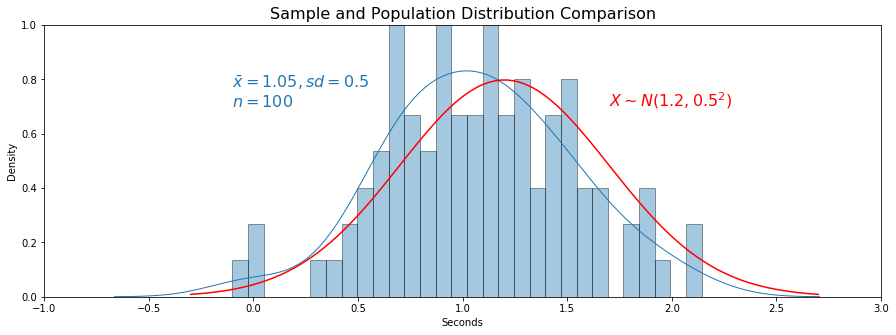

In [156]:
plt.figure(figsize=(15, 5))
sns.distplot(rat_drug, hist=True, kde=True, bins = int((max(rat_pop)-min(rat_pop))/.1),
            hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
plt.plot(rat_pop, stats.norm.pdf(rat_pop, mu, sigma), color='red')
plt.ylabel('Density') # Label the y axis
plt.xlabel('Seconds') # Label the x axis
plt.title('Sample and Population Distribution Comparison', fontsize=16) # Plot title
plt.axis([-1, 3, 0, 1]) # Plot axis [xmin, xmax, ymin, ymax]
plt.text(-.1, .7, r'$\bar{x}=1.05, sd=0.5$' '\n$n = 100$', color='C0', fontsize=16)
plt.text(1.7, .7, '$X \sim N(1.2, 0.5^2)$', color='red', fontsize=16)
plt.show()

Based off this comparison it seems that rats treated with the drug, on average, have faster response times than untreated rats. But how can we be sure that the drug has an effect on response times from this randomly selected sample of 100 rats? The difference in the distribution of response times of the sample and the population could come from two potential sources:

    1. The 100 randomly selected rats to be treated happened to faster rats (chance).
    2. The drug actually has an effect on rat response times and makes the reats react faster (a real effect).

How do scientists distinguish between these two channels that could both potentially explain the difference in a sample distribution and the population? The answer is they cannot. But they can use tests to quantify the first channel (chance). That is, using statistics, scientists determine the probability of observing a particular random sample. And if that probability is below some threshold, they attribute the difference between sample and population distributions to a real effect rather than chance. 

In this problem, we want to determine the probability of observing the <font color=blue>sample</font> distribution if the 100 rats that make it up were randomly selected from the <font color=red>population</font> distribution.

If the probability of observing this sample is very low, then it is likely that rats treated with the drug should be considered a different population entirely, with their own mean and variance:
<br>
<center> $X' \sim N(\mu', \sigma'^2)$ </center>

Thus, we want to test whether or not the population distribution of treated rats is the same as the population distribution of untreated rats:

<br>
<center> $X' = X$ or $X' \neq X$? </center>

A way to test whether these two population distributions are different is to test whether their 'centers' are different, i.e. if their *means* are different:

<br>
<center> $\mu' = \mu$, or $\mu' \neq \mu$ ? </center>

If we can determine that the means of these two population distributions are different with a high level of confidence, we can be that confident that the drug has a real effect.

A test to see if the means of these two population distributions are truly different is a two-tailed hypothesis test. The rationale goes like this:

If we assume that the two population distributions are the same, $\mu' = \mu$, what is the probability that we would get the sample distribution that we did?

In more detail, if we assume that the population mean response time of rats treated with the drug is equal to the population mean response time of untreated rats, $\mu' = \mu =$ 1.2 seconds, then what is the probability that we would get a distribution of 100 rat response times with a mean of 1.05 seconds ($\bar{x}$), and a standard devation of 0.5 seconds (sd)?

Furthermore, what is the probability of getting a sample that looks like this, or a MORE EXTREME sample?

## Sampling Distribution

In order to test the probability of getting the sample we did ($\bar{x}$ = 1.05, $sd$=0.5, $n$=100), or a more extereme sample if we are pulling from the population of response times of untreated rats $X \sim N(\mu, \sigma^2)$, we have to construct a __sampling distribution__.

Since we are comparing the 'centers' of the two population distributions, we construct a sampling distribution of the mean, which is the distribution of means of infinite pulls of $n$ observations from the population distribution.

In this case, it is the distribution of mean response times of infinite pulls of 100 rats from the population $X \sim N(1.2, \sigma^2)$.

More intuitively, if you repeatedly randomly select 100 rats from the population distribution, calculate the mean response times of each of those selections of 100 rats, and then plot those means, that is the sampling distribution. The sampling distribution is the distribution of sample means.

In theory, as long as the draws are all the same size ($n$), then the mean of the sampling distribution is equal to the mean of the population distribution the samples are drawn from. This is true since the average of sub-averages is the same as the overall average of all the terms if the sub-averages all have the same number of terms. The standard deviation of the sampling distribution is equal to the standard deviation of the population distribution divided by the square root of the number of observations in each draw, $sd_\bar{x} = \sigma/\sqrt{n}$.

It is often difficult and/or unrealistic to construct a sampling distribution empirically, but it can be found in theory from just one sample.

Below, is a demonstration of the construction of a sampling distribution from our theoretical population $X \sim N(1.2, 0.5^2)$. Here, 10,000 random draws of 100 observations are taken from the population distribution, and the sample distribution mean and standard devation are calculated:

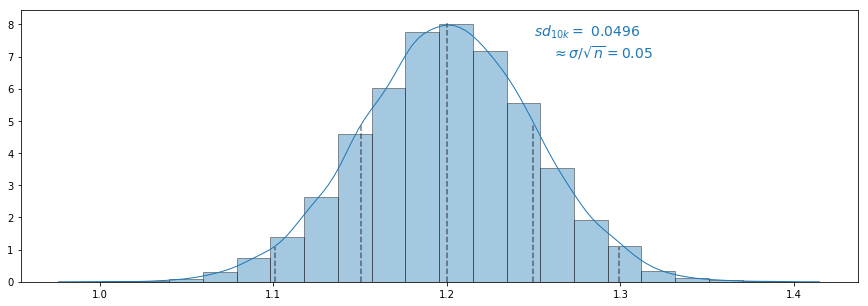

In [157]:
# Make 10000 draws of 100 observation from a normal distribution with mean 1.2 and sd 0.5
mu = 1.2
sigma = 0.5
n = 100
np.random.seed(1)
draws = np.random.normal(1.2, 0.5, size = (n, 10000)) 

# Calculate the mean of each column
# Each column of the matrix draws is a random sample of 100
sample_dist = draws.mean(axis=0)

# Get the standard deviation lines
xbar = sample_dist.mean()
sd = sample_dist.std()
xposition = [xbar, xbar+sd, xbar+sd*2, xbar-sd, xbar-sd*2]
std_dev_lines = stats.norm.pdf(xposition, xbar, sd)

plt.figure(figsize=(15, 5))
sns.distplot(sample_dist, hist=True, kde=True, bins = int(100/5),
            hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
for xc, yc in zip(xposition, std_dev_lines):
    plt.vlines(x=xc, ymin=0, ymax=yc, color='k', linestyle='--', alpha=0.5)
plt.text(1.25, 7, '$sd_{10k} =$ '+str(round(sd,4))+ '\n    $\\approx \sigma/\sqrt{n} = 0.05$', color='C0',
        fontsize=14)
plt.show()


So, let's conduct a two-tailed hypothesis test using the sampling distribution of the mean reponse time. 

## Hypotheses

In this case, we are testing whether the drug had a nonzero effect on response times. This means that we are testing whether the population distribution of treated rats is equal to the population distribution of untreated rats, using our sample of 100 rats as evidence.

$X' \sim N(\mu',\sigma'^2) = X \sim N(\mu,\sigma^2)$ ?

Let's assume that the population distribution of treated rats IS EQUAL to the population distribution of untreated rats (i.e. the drug has no effect) and see how likely it is that we would have gotten the sample of 100 rats that we did.

$H_0$: The drug has no effect => $\mu' = \mu = 1.2$ seconds.
<br>
$H_1$: The drug has an effect => $\mu' \neq \mu. \mu' \neq 1.2$ seconds.

Since we know the theoretical parameters of the sampling distribution of the mean, we can construct it. Then we can look at where the sample mean that we drew lies on this distribution, and determine the probability of drawing this sample if we drew from the population of untreated rats.

So, we know that the sampling distribution of the mean is normally distributed, with a mean equal to the mean of the population distribution. And we also know that the standard deviation of the sampling distribution is equal to the standard deviation of the population distribution divided by the square root of the number of observations in the draw.

$X_\bar{x} \sim N(\mu, (\sigma/\sqrt{n})^2)$

Looking back at the initial prompt, the mean of the population distribution was given, $\mu=1.2$, but the standard deviation was not. It is okay here to use the standard deviation of the 100 rat sample to approximate for the population standard deviation, $\sigma = sd$.

Below is a visual of the theoretical sampling distribution $X_\bar{x} \sim N(\mu, (sd/\sqrt{n})^2)$:

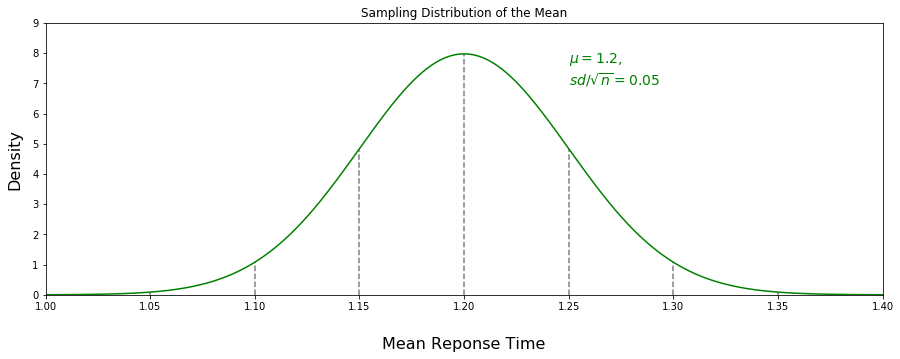

In [158]:
# Plot a normal distribution with mean 1.2 and std dev 0.5
mu = 1.2
sigma = 0.5
n =100
sd = sigma/math.sqrt(n)
sample_dist = np.linspace(mu - 4*sd, mu + 4*sd, 10000) 

# Get height of standard deviation lines
xposition = [mu, mu+sd, mu+sd*2, mu+sd*3, mu-sd, mu-sd*2, mu-sd*3]
xposition.sort()
std_dev_lines = stats.norm.pdf(xposition, mu, sd)

plt.figure(figsize=(15, 5))
plt.plot(sample_dist, stats.norm.pdf(sample_dist, mu, sd), color='green')
plt.ylabel('Density', fontsize=16, labelpad=10) # Label the y axis
plt.xlabel('Mean Reponse Time', fontsize=16, labelpad=25) # Label the y axis
plt.title('Sampling Distribution of the Mean') # Plot title
plt.axis([mu-4*sd, mu+4*sd, 0, 9]) # Plot axis [xmin, xmax, ymin, ymax]
#plt.grid(True) # Add grid lines
#axvline(self, x=0, ymin=0, ymax=1, **kwargs)[source]
#plt.axvline(x=1.2, ymin=0, ymax=ymax, linestyle='dashed', color='green', alpha=0.5)
#plt.text(1, .9, '$X \sim N(1.2, 0.5^2)$', color='red', fontsize=16)
for xc, yc in zip(xposition, std_dev_lines):
    plt.vlines(x=xc, ymin=0, ymax=yc, color='k', linestyle='--', alpha=0.5)
#plt.xticks(np.arange(mu-sigma*3, mu+sigma*3, 0.5))
#plt.text(1.1, -0.11, '$\mu = 1.2$', fontsize=16, color = 'red', alpha = 0.5)
plt.text(1.25, 7, '$\mu = 1.2$,\n$sd/\sqrt{n} = 0.05$', color='green',
        fontsize=14)
plt.show()

It is apparent that a mean response of time 1.05 seconds for a draw of 100 rats is well below the mean of the sampling distribution. In fact, it is exactly 3 standard deviations below the mean of the sampling distribution. This can be confirmed by converting the 1.05 mean response time to a z-score, which tells you how many standard deviations from the mean of the sampling distribution you are:
<br>
$Z=\frac{\bar{x}-\mu}{\sigma_\bar{x}}$ = $\frac{1.05-1.2}{0.05} = -3$.

Visually we can see that drawing a sample mean of 1.05, a value 3 standard deviations below the mean of the sampling distribution, is unlikely. But how do we _quantify_ how unlikely it is?

Since the sample mean is a random variable that is normally distributed, we know the probability of observing any given sample mean in the distribution given its distance from the mean of the sampling distribution. Below is a diagram of the sampling distribution with corresponding probabilities within up to 4 standard deviations from the mean.

This is the same as the 68-95-99.7 rule of normal distributions (note the same colored areas cumulatively add to these numbers).

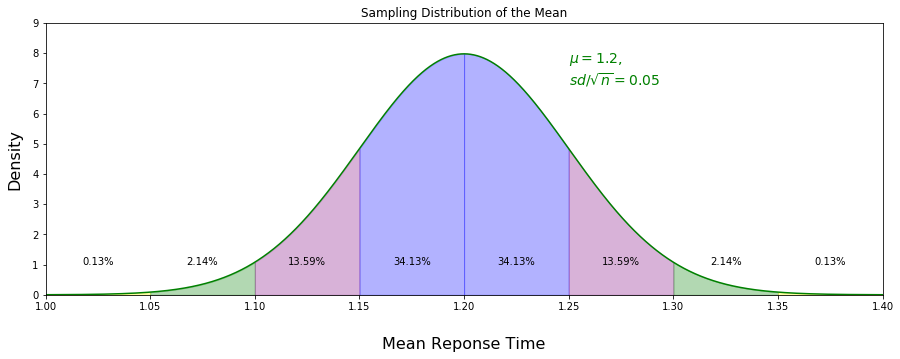

In [159]:
percents = ['0.13%', '2.14%', '13.59%', '34.13%', '34.13%', '13.59%', '2.14%', '0.13%']
colors = ['yellow', 'green', 'purple', 'blue', 'blue', 'purple', 'green', 'yellow']

# Combine the x and y values of the sample distribution into a matrix
#sdist_mat = np.c_[sample_dist, stats.norm.pdf(sample_dist, mu, sd)]
sdist_mat = pd.DataFrame(list(zip(sample_dist, stats.norm.pdf(sample_dist, mu, sd))))
    
plt.figure(figsize=(15, 5))
plt.plot(sample_dist, stats.norm.pdf(sample_dist, mu, sd), color='green')
plt.ylabel('Density', fontsize=16, labelpad=10) # Label the y axis
plt.xlabel('Mean Reponse Time', fontsize=16, labelpad=25) # Label the y axis
plt.title('Sampling Distribution of the Mean') # Plot title
plt.axis([mu-4*sd, mu+4*sd, 0, 9]) # Plot axis [xmin, xmax, ymin, ymax]
#plt.grid(True) # Add grid lines
#axvline(self, x=0, ymin=0, ymax=1, **kwargs)[source]
#plt.axvline(x=1.2, ymin=0, ymax=ymax, linestyle='dashed', color='green', alpha=0.5)
#plt.text(1, .9, '$X \sim N(1.2, 0.5^2)$', color='red', fontsize=16)
#for xc, yc in zip(xposition, std_dev_lines):
#    plt.vlines(x=xc, ymin=0, ymax=yc, color='k', linestyle='--', alpha=0.8)
#plt.xticks(np.arange(mu-sigma*3, mu+sigma*3, 0.5))
#plt.text(1.1, -0.11, '$\mu = 1.2$', fontsize=16, color = 'red', alpha = 0.5)
plt.text(1.25, 7, '$\mu = 1.2$,\n$sd/\sqrt{n} = 0.05$', color='green',
        fontsize=14)
for xc, p in zip([xposition[0]-sd] + xposition, percents):
    plt.text(xc+sd/2, 1, p, color='k', horizontalalignment = 'center')
#plt.fill_between(sample_dist, 0, stats.norm.pdf(sample_dist, mu, sd)) # Shade under the whole curve
# Shade the curve by section
for i, j, c in zip(np.linspace(1.0, 1.4, 9)[0:8], np.linspace(1.0, 1.4, 9)[1:9], colors):
    plt.fill_between(sdist_mat[(sdist_mat.iloc[:,0] >i) & (sdist_mat.iloc[:,0] <j)].iloc[:,0], 0, 
                     sdist_mat[(sdist_mat.iloc[:,0] >i) & (sdist_mat.iloc[:,0] <j)].iloc[:,1], color=c, alpha=0.3)
plt.show()


As is evident from the above diagram, observing a sample mean of 1.05 or less amounts to a probability of 0.13%- a very low likelihood! In fact, it's so unlikely that the corresponding area of the sampling distribution is almost not visible.

Let's zoom in on this graph to reiterate visually how unlikely it would be to draw this sample mean:

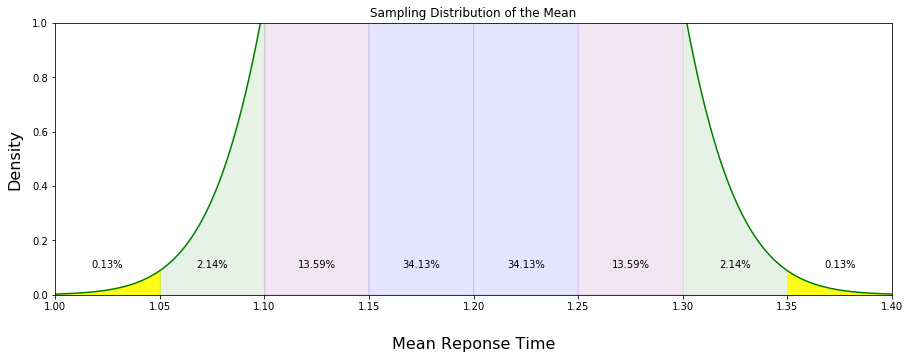

In [160]:
alphas = [0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.9]

plt.figure(figsize=(15, 5))
plt.plot(sample_dist, stats.norm.pdf(sample_dist, mu, sd), color='green')
plt.ylabel('Density', fontsize=16, labelpad=10) # Label the y axis
plt.xlabel('Mean Reponse Time', fontsize=16, labelpad=25) # Label the y axis
plt.title('Sampling Distribution of the Mean') # Plot title
plt.axis([mu-4*sd, mu+4*sd, 0, 1]) # Plot axis [xmin, xmax, ymin, ymax]
#plt.grid(True) # Add grid lines
#axvline(self, x=0, ymin=0, ymax=1, **kwargs)[source]
#plt.axvline(x=1.2, ymin=0, ymax=ymax, linestyle='dashed', color='green', alpha=0.5)
#plt.text(1, .9, '$X \sim N(1.2, 0.5^2)$', color='red', fontsize=16)
#for xc, yc in zip(xposition, std_dev_lines):
#    plt.vlines(x=xc, ymin=0, ymax=yc, color='k', linestyle='--', alpha=0.8)
#plt.xticks(np.arange(mu-sigma*3, mu+sigma*3, 0.5))
#plt.text(1.1, -0.11, '$\mu = 1.2$', fontsize=16, color = 'red', alpha = 0.5)
for xc, p in zip([xposition[0]-sd] + xposition, percents):
    plt.text(xc+sd/2, 0.10, p, color='k', horizontalalignment = 'center')
#plt.fill_between(sample_dist, 0, stats.norm.pdf(sample_dist, mu, sd)) # Shade under the whole curve
# Shade the curve by section
for i, j, c, a in zip(np.linspace(1.0, 1.4, 9)[0:8], np.linspace(1.0, 1.4, 9)[1:9], colors, alphas):
    plt.fill_between(sdist_mat[(sdist_mat.iloc[:,0] >i) & (sdist_mat.iloc[:,0] <j)].iloc[:,0], 0, 
                     sdist_mat[(sdist_mat.iloc[:,0] >i) & (sdist_mat.iloc[:,0] <j)].iloc[:,1], color=c, alpha=a)
plt.show()

The yellow highlighted region to the left of 1.05 is a visual representation of the probability of drawing a sample mean of 1.05 or less. Even after zooming in on this graph to a y-scale of 0 to 1, this area of the distribution is still very small, and correspondingly very unlikely. From this chart we can confirm that the probability of drawing a sample mean of 1.05 or less amounts to a measily 0.13%.

So, we know the probablility of obtaining a sample of 100 rats with a mean response time of 1.05 seconds or less, but recall the hypotheses stated above:

$H_0$: The drug has no effect => $\mu' = \mu = 1.2$ seconds.
<br>
$H_1$: The drug has an effect => $\mu' \neq \mu. \mu' \neq 1.2$ seconds.

The null hypothesis is that the mean of the population distribution of treated rats is equal to 1.2 seconds, and the alternative hypothesis is that it is _not_ equal to 1.2 seconds. If we were simply testing that the mean is _less_ than 1.2 seconds, then we could could say this probability, or __p-value__ is 0.0013. But since we are testing whether the mean is _equal_ to 1.2 seconds, we must take into account the probability that the mean of the population distribution of treated rats could be _greater_ than 1.2 seconds.

We know the probability correspoding to observing a mean 3 standard deviations or less below the mean of the sampling distribution. So we also have to include the probability corresponding to observing a mean 3 standard deviations or higher. These two probabilities are equal in a normal distribution and are highlighted in yellow in the figure above.

Adding the probabilites of these two sections of the probability distribution yield:

$0.13\% * 2 = 0.26\%$

Thus, we have found the probability of the null hypothesis: $P(H_0) = 0.0026$. The implication is that the probability of the mean of the population distribution of treated rats being 1.2 seconds is 0.26%, an incredibly unlikely outcome.

But how unlikely is unlikely enough to say that the drug actually has a real effect, i.e. the alternative hypothesis is true? The answer to this question is debated in the scientific community, but usually an arbitraty threshold is determined prior to running a hypothesis test.

Some commonly used thresholds are .10, .05, .01, and .001. The lower the threshold, the less likely it is that the sample observed is due to chance, and the more confident we can be in the result of the test. If the probability of the null hypothesis, or p-value, is less than the pre-determined threshold, then we reject the null hypothesis for the alternative. In this case, depending on the threshold used, we are able to reject the null for the alternative. If we use a threshold of .10, .05, or .01, we are able to reject the null because our calculated p-value from this hypothesis test was .0026. But if we use the more precise threshold of .001, we are unable to reject.

For the sake of closure, let's say our threshold, also known as a _confidence level_ and denoted by the symbol $\alpha$, was .05. In this case, our calculated p-value is less than this threshold:

$0.0026 < 0.05 \Rightarrow p < \alpha$.

Thus, we reject the null hypothesis $H_0$ in favor of the alternative hypothesis: 

$H_1$: The drug has an effect $ \Rightarrow \mu' \neq \mu. \mu' \neq 1.2$ seconds.

Thus, we conclude that the drug does have an effect on rat response times to the stimulus.